# Day 62

## Importing the libraries

In [6]:
# !pip install nltk
# !pip install WordCloud
# !pip install scikit-plot

In [8]:
import opendatasets as od
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

# NLTK 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

# Wordcloud
from wordcloud import wordcloud

nltk.download("stopwords")
nltk.download('wordnet')

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer 
# to conver the sentence into pieces 

# to peprform the hyperparameter on random forest classifier to find out ther best
# parametric value for the random forest classifier model.
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from scikitplot.metrics import plot_confusion_matrix 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import the Dataset

Link: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [2]:
od.download("https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt")

Skipping, found downloaded files in ".\emotions-dataset-for-nlp" (use force=True to force download)


In [3]:
os.listdir("./emotions-dataset-for-nlp/")

['test.txt', 'train.txt', 'val.txt']

In [4]:
df_train = pd.read_csv("./emotions-dataset-for-nlp/train.txt", delimiter=';', names =['text', 'label'])
df_val = pd.read_csv('./emotions-dataset-for-nlp/val.txt', delimiter=';', names =['text', 'label'])

In [5]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [7]:
df = pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [8]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
df.tail()

,text,label
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [10]:
df.shape

(18000, 2)

In [11]:
df.sample(5)

,text,label
628,i truly feel but its somehow not enough for me...,anger
14748,i did not feel frightened just frustrated that...,fear
6253,i feel thrilled i feel blessed i feel honored ...,joy
12342,ive told friends and fellow fans i feel like w...,joy
7739,i woke up feeling cranky this morning,anger


In [12]:
df.head(2)

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness


In [13]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [14]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

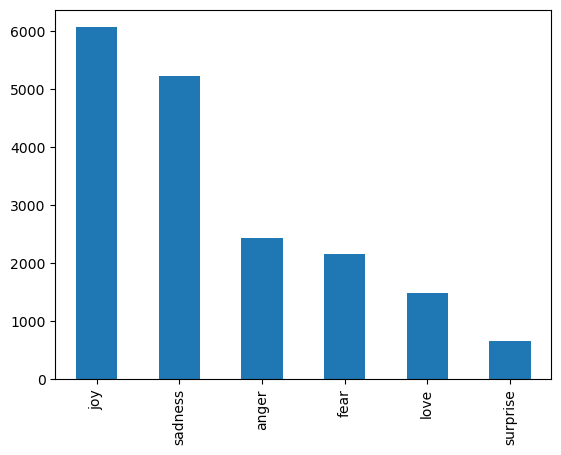

In [15]:
df.label.value_counts().plot(kind='bar');

In [16]:
# Positive Sentiments - Joy, Love, Surprise --> 0
# NEgative Sentiments - Anger, Sadness, Fear --> 1

In [17]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [18]:
df.label.replace(to_replace=['joy', 'love', "surprise"], value=0, inplace = True)
df.label.replace(to_replace=['anger', 'sadness', 'fear'], value=1, inplace=True)

In [19]:
df.head()

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,0
4,i am feeling grouchy,1


In [20]:
df.label.value_counts()

1    9799
0    8201
Name: label, dtype: int64

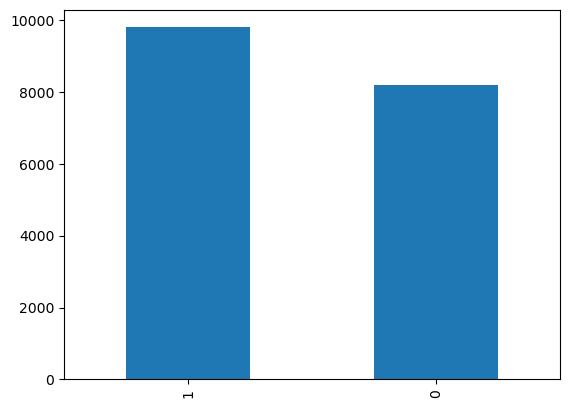

In [21]:
df.label.value_counts().plot(kind='bar');

In [22]:
for i in df.text:
    re.sub('[^a-zA-z]+',' ',str(i))
    print(i)

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too
i feel like i have to make the suffering i m seeing mean something
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i think it s the easiest time of year to feel dissatisfied
i feel low energy i m just thirsty
i have immense sympathy with the general point but a

### Lemmatizers

- As we can see feeling and feel are the same after Lemmatizer so we can conclude that we have to use different type of Lemmatizer 
  for better outcome.
- this Lemmatizer is not working as it should be.
  
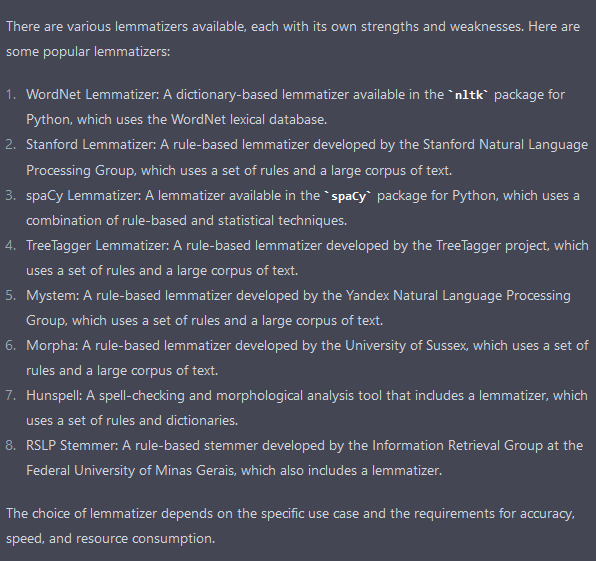

- Gensim and spacy are variously used in the NLP
- Link: https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

In [23]:
lm = WordNetLemmatizer()

In [24]:
def tranformation(df_columns):
    output = []
    for i in df.text:
        new_txt = re.sub('[^a-zA-z]+',' ',str(i))
        new_txt = new_txt.lower()
        new_txt = new_txt.split()
        new_txt = [lm.lemmatize(j) for j in new_txt if j not in set(stopwords.words('english')) ]
        output.append(" ".join (str (k) for k in new_txt))
        
    return output
        

In [25]:
var = tranformation(df.text)

In [26]:
var

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

## Word Cloud
>A word cloud is a visual representation of text data, where the size of each word is proportional to its frequency or importance in the text. Word clouds are typically used to visualize the most frequently occurring words in a piece of text, such as a book, article, or social media post.
>
>In a word cloud, words are arranged in a random or structured manner, and the font size, color, or style of each word can be customized to highlight important words or themes. The resulting visualization can provide a quick and intuitive overview of the most common words or topics in a text, and can be useful for summarizing, exploring, or communicating insights from textual data.
>
>Word clouds can be generated using various tools and libraries, such as Wordle, TagCrowd, Python's wordcloud library, or R's wordcloud package. These tools typically require the user to input a text file or a URL, and then generate a word cloud image that can be downloaded or shared.

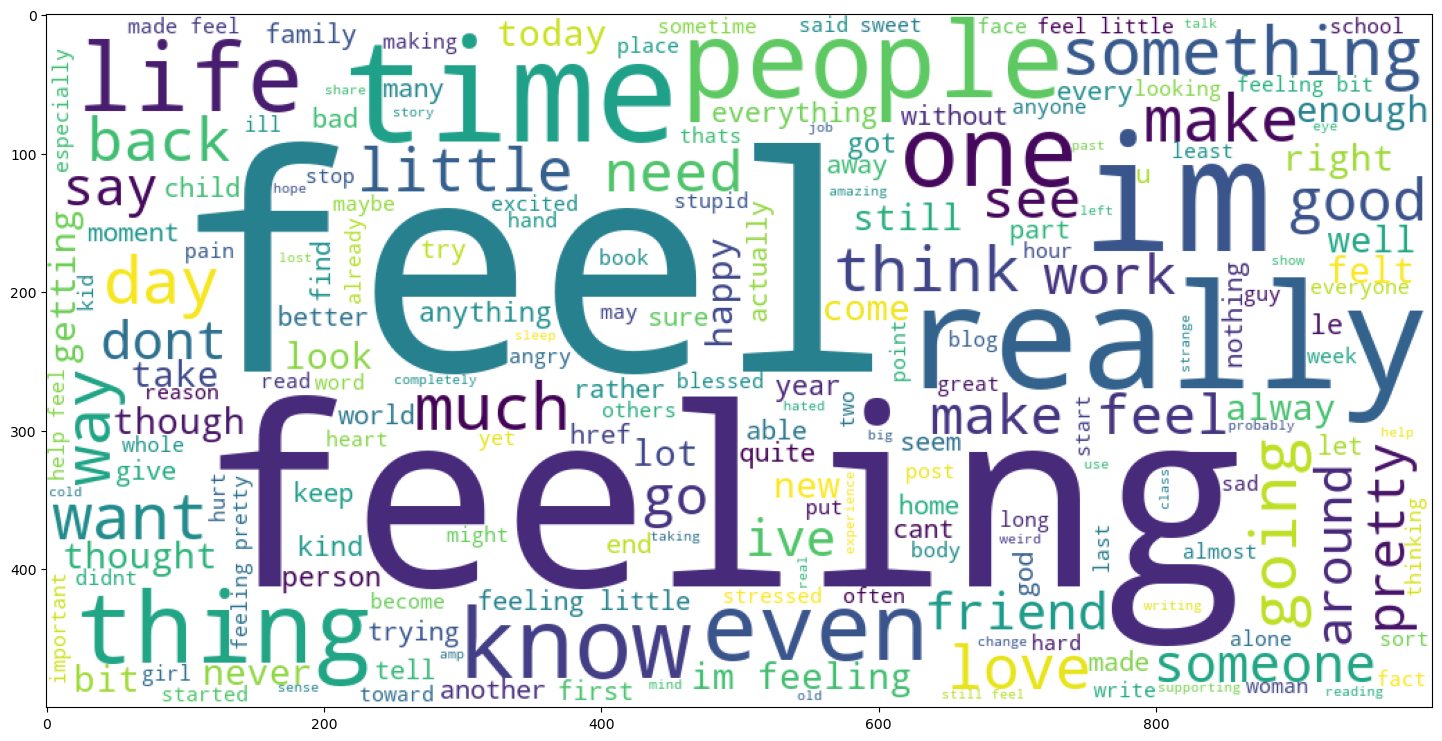

In [44]:
plt.figure(figsize=(30,9));

word = ''
for i in var:
    for j in i:
        word += " ".join(j)
        
from wordcloud  import WordCloud
wc = WordCloud(width= 1000, height=500, background_color="white", min_font_size=10).generate(word)
plt.imshow(wc);

In [45]:
# Bag of Words model (BOW)

In [46]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(var)
X_train = traindata
y_train = df.label

In [47]:
X_train

<18000x117594 sparse matrix of type '<class 'numpy.int64'>'
	with 311217 stored elements in Compressed Sparse Row format>

In [48]:
y_train

0        1
1        1
2        1
3        0
4        1
        ..
17995    1
17996    0
17997    0
17998    0
17999    0
Name: label, Length: 18000, dtype: int64

In [49]:
model = RandomForestClassifier()

In [52]:
# Hyper Parameter Tuning
# bootstrap is a technique for estimating the accuracy and uncertainty of a statistic by resampling data.

parameters = {'max_features':('sqrt', 'auto'),
              'n_estimators':[500, 1000, 1500],
              'max_depth': [5,10, None],
              'min_samples_leaf':[1,2,5,10],
              'min_samples_split': [5,10,15],
              'bootstrap' : [True, False]}

In [51]:
parameters

{'max_features': ('sqrt', 'log2'),
 'n_estimators': [500, 1000, 1500],
 'max_depth': [5, 10, None],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True, False]}

In [53]:
grid_search = GridSearchCV(model, 
                           parameters,
                           cv = 5,
                           return_train_score= True,
                           n_jobs=1)

In [54]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(max_features = grid_search.best_params_['max_features'],
                             n_estimators = grid_search.best_params_['n_estimators'].
                             max_depth = grid_search.best_params_['max_depth'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             min_samples_split = grid_search.best_params_['min_samples_split'],
                             bootstrap = grid_search.best_params_['bootstrap'],)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
test_data = 
X_test, y_test

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
# Model Evaluation
accuracy_score(y_test, y_pred)

In [ ]:
def sentimental_analysis(input):
    new_input = tranformation(input)
    transformed_input = cv.transform(new_input)
    prediction = rfc.predict(transformed_input)
    if prediction == 0:
        print('Negative Sentiment')
    elif prediction == 1:
        print('Positive Sentiment')
    else:
        print('Invalid Sentiment')

In [ ]:
input = "Today I was playing in the park and I fell"
inp = input("")

In [ ]:
sentimental_analysis(inp)